In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Desktop/TSLA.csv.xls")

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


## Using all the Features let's try to predict Volume of TESLA stock using regression model

## Feature Engineering With EDA

In [30]:
data["Date"] = pd.to_numeric(pd.to_datetime(data["Date"]))

In [31]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2.843000e+03,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2.843000e+03
mean,1.456122e+18,105.868475,108.031370,103.555733,105.924597,105.924597,3.141524e+07
std,1.029431e+17,188.738974,192.483055,184.638617,188.836358,188.836358,2.841880e+07
min,1.277942e+18,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,1.367237e+18,10.698000,11.026000,10.420000,10.727000,10.727000,1.251050e+07
50%,1.456272e+18,45.874001,46.493999,45.102001,45.916000,45.916000,2.481500e+07
75%,1.545134e+18,65.021000,66.251999,64.015001,65.275002,65.275002,4.012025e+07
max,1.634170e+18,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


<AxesSubplot:xlabel='High'>

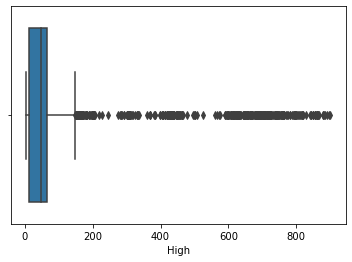

In [33]:
sns.boxplot(data=data,x="High")

<AxesSubplot:xlabel='Low'>

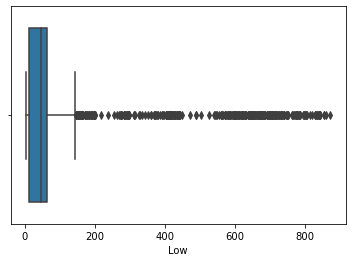

In [34]:
sns.boxplot(data=data,x="Low")

### The feature "High" has highest positive correlation amongst all other feature.

In [35]:
data.corr()["Volume"].sort_values(ascending=False)

Volume       1.000000
Date         0.469954
High         0.150014
Close        0.145800
Adj Close    0.145800
Open         0.144874
Low          0.139580
Name: Volume, dtype: float64

### Preparing data for applying Machine learning model

#### 1) Splitting data into train-test.

In [39]:
x = data.drop("Volume",axis=1)
y = data["Volume"]


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

#### 2) Scaling data, as it improves convergence of steepest gradient descent and no one feature updates faster than other.

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)


### 3) Using Regression model we will compare each algorithm with one another.

#### 1) Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

Linear_model = LinearRegression()
Linear_model.fit(x_train_scaled,y_train)

y_pred_linear = Linear_model.predict(x_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error

linear_mae = mean_absolute_error(y_pred_linear,y_test)
linear_mse = mean_squared_error(y_pred_linear,y_test)
linear_rmse = np.sqrt(linear_mse)


In [80]:
linear_mae,linear_mse,linear_rmse

(14885499.768181618, 510789096906625.56, 22600643.727704428)

#### 2) Polynomial Regression

In [81]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

Poly_model = PolynomialFeatures(degree = 4)
x_poly = Poly_model.fit_transform(x_train_scaled)
x_test_poly = Poly_model.transform(x_test_scaled)

Linear_model.fit(x_poly,y_train)

y_pred_poly = Linear_model.predict(x_test_poly)

from sklearn.metrics import mean_absolute_error,mean_squared_error

poly_mae = mean_absolute_error(y_pred_poly,y_test)
poly_mse = mean_squared_error(y_pred_poly,y_test)
poly_rmse = np.sqrt(poly_mse)


In [82]:
poly_mae,poly_mse,poly_rmse

(11216015.839412006, 1822814353687751.5, 42694430.00776274)

#### 3) RandomForestRegressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor(n_estimators=300)

random_model.fit(x_train_scaled,y_train)

y_pred_random = random_model.predict(x_test_scaled)

random_mae = mean_absolute_error(y_pred_random,y_test)
random_mse = mean_squared_error(y_pred_random,y_test)
random_rmse = np.sqrt(poly_mse)


In [84]:
random_mae,random_mse,random_rmse

(8475309.139116842, 270385499529591.84, 42694430.00776274)

#### 4) DecisionTreeRegressor

In [85]:
from sklearn.tree import DecisionTreeRegressor

decision_model = DecisionTreeRegressor()

decision_model.fit(x_train_scaled,y_train)

y_pred_decision = decision_model.predict(x_test_scaled)


decision_mae = mean_absolute_error(y_pred_decision,y_test)
decision_mse = mean_squared_error(y_pred_decision,y_test)
decision_rmse = np.sqrt(poly_mse)



In [86]:
decision_mae,decision_mse,decision_rmse

(10804235.52168816, 442508575203388.0, 42694430.00776274)

#### 5) Support Vector Machine - regressor 

In [87]:
from sklearn.svm import SVR

svr_model = SVR()

svr_model.fit(x_train_scaled,y_train)

y_pred_svr = svr_model.predict(x_test_scaled)

svr_mae = mean_absolute_error(y_pred_svr,y_test)
svr_mse = mean_squared_error(y_pred_svr,y_test)
svr_rmse = np.sqrt(poly_mse)

In [90]:
final_results = pd.DataFrame(data = {"Linear":[linear_mae,linear_mse,linear_rmse],"Polynomial":[poly_mae,poly_mse,poly_rmse],"Random Forest":[random_mae,random_mse,random_rmse],"Decision Tree":[decision_mae,decision_mse,decision_rmse],"Support Vector Machine":[svr_mae,svr_mse,svr_rmse]},index= ["Mean Absolute Error","Mean Squared Error","Root Mean Squared Error"])





In [91]:
final_results

,Linear,Polynomial,Random Forest,Decision Tree,Support Vector Machine
Mean Absolute Error,1.488550e+07,1.121602e+07,8.475309e+06,1.080424e+07,1.902252e+07
Mean Squared Error,5.107891e+14,1.822814e+15,2.703855e+14,4.425086e+14,8.575976e+14
Root Mean Squared Error,2.260064e+07,4.269443e+07,4.269443e+07,4.269443e+07,4.269443e+07
